In [18]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import ElasticNet
from sklearn import neighbors
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

In [3]:
data_all = pd.read_csv('features_tree_one_hot.csv')
data_all

,teager_kaiser_energy_6mean,time_corr_F8,max_cross_corr_C4,fractal_katz,phase_lock_val_F3,fisher_information,decorr_time,max_cross_corr_T8,max_cross_corr_P3,spect_corr_C4,...,Subj_30,Subj_31,Subj_32,Subj_33,Subj_34,Subj_35,Subj_36,Subj_37,Subj_38,Subj_39
0,0.001852,0.193831,0.518370,0.469241,0.559155,0.460298,0.2,0.788509,0.428153,0.289757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002101,0.274256,0.414768,0.365786,0.000000,0.467803,0.4,0.674814,0.210838,0.402709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.001109,0.233510,0.546032,0.358015,0.357802,0.452609,0.4,0.660710,0.080080,0.550399,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.006222,0.327797,0.391454,0.468610,0.503995,0.325184,0.4,0.628290,0.153154,0.793829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.001921,0.576995,0.108699,0.351228,0.321692,0.510215,0.4,0.519071,0.557525,0.404987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21026,0.014841,0.492309,0.855602,0.389998,0.121597,0.547843,0.0,0.447101,0.694548,0.807045,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21027,0.013717,0.840575,0.000000,0.397695,0.094456,0.470511,0.0,0.783243,0.543601,0.493005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21028,0.050507,0.967379,0.770535,0.520693,0.070129,0.283860,0.0,0.000000,0.189368,0.130337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21029,0.018568,0.965960,0.922056,0.413610,0.094394,0.480124,0.0,0.843492,0.314496,0.798449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
X_test = data_all.loc[(data_all['film'] == 42)].reset_index(drop=True)

X_train = data_all.loc[(data_all['film'] != 42)].reset_index(drop=True)

In [6]:
X_train = X_train.sample(frac=1)
X_test = X_test.sample(frac=1)

y_train = X_train['labels']
y_test = X_test['labels']

train_film = X_train['film']
train_subj = X_train['Subj']
train_ch = X_train['ch']
test_film = X_test['film']
test_subj = X_test['Subj']
test_ch = X_test['ch']
X_train = X_train.drop(['labels', 'ch', 'Subj', 'film'], axis=1)
X_test = X_test.drop(['labels', 'ch', 'Subj', 'film'], axis=1)

<AxesSubplot:>

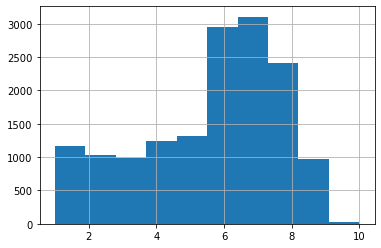

In [7]:
y_train.hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

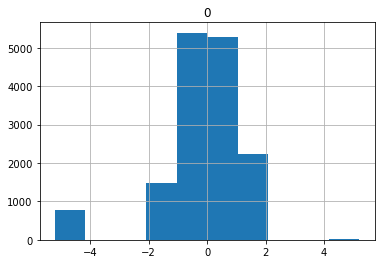

In [8]:
qt_train = QuantileTransformer(output_distribution='normal', copy=True)
y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
y_train.hist()

<AxesSubplot:>

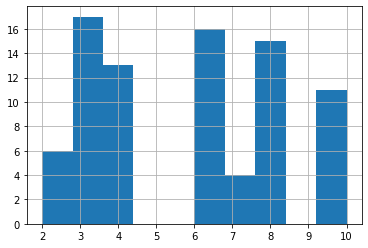

In [9]:
y_test.hist()

C:\Users\po6wi\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (82). n_quantiles is set to n_samples.
  warnings.warn(


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

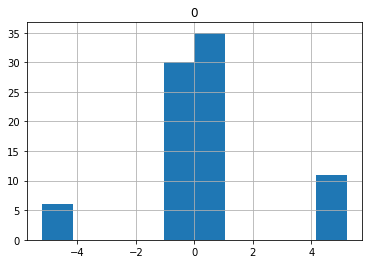

In [10]:
qt_test = QuantileTransformer(output_distribution='normal', copy=True)
y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test).reshape(-1, 1)))
y_test.hist()

In [14]:
from sklearn.model_selection import GridSearchCV

In [12]:
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
             scoring='neg_root_mean_squared_error')

In [13]:
searcher.best_params_["alpha"]

1

In [14]:
model = Ridge(searcher.best_params_["alpha"]).fit(X_train, y_train)

In [15]:
y_pred = model.predict(X_test)

In [10]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))

In [19]:
y_test_inv = qt_test.inverse_transform(np.array(y_test).reshape(-1, 1))

In [20]:
print(r2_score(y_test_inv, preds))
print(mean_absolute_percentage_error(y_test_inv, preds))
print(mean_absolute_error(y_test_inv ,preds))

0.44090396969885237
0.23763898690023935
1.271621773390073


## Усреднение оценок по каналам

In [21]:
pred = [[0 for j in range(8)] for i in range(42)]
num_chans = [[0 for j in range(8)] for i in range(42)]
labels = [[0 for j in range(8)] for i in range(42)]
lbl = [[0 for j in range(8)] for i in range(42)]
for i in range(len(preds)):
    pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
    num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
    labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
labels = np.nan_to_num(labels)
pred = np.nan_to_num(pred)
predicted = []
lbl = []
for i in range(len(labels)):
    if sum(labels[i]) != 0:
        for j in range(4):
            if labels[i][j] != 0:
                lbl.append(labels[i][j])  
                predicted.append(pred[i][j])

<ipython-input-21-a9645642cf24>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
<ipython-input-21-a9645642cf24>:9: RuntimeWarning: invalid value encountered in true_divide
  labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
<ipython-input-21-a9645642cf24>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
<ipython-input-21-a9645642cf24>:10: RuntimeWa

In [22]:
for [l, p] in zip(lbl, predicted):
    print(l, p)

10.0 6.520475923607427
8.0 7.884917184138755
3.0 3.01238906562072
6.0 5.116410086325303
2.0 3.5
7.0 3.0
4.0 5.917225046569353


In [23]:
print(r2_score(lbl, predicted))
print(mean_absolute_percentage_error(lbl, predicted))
print(mean_absolute_error(lbl ,predicted))

0.2954081546395164
0.33063818097793035
1.7011158454455126


In [24]:
import matplotlib.pyplot as plt

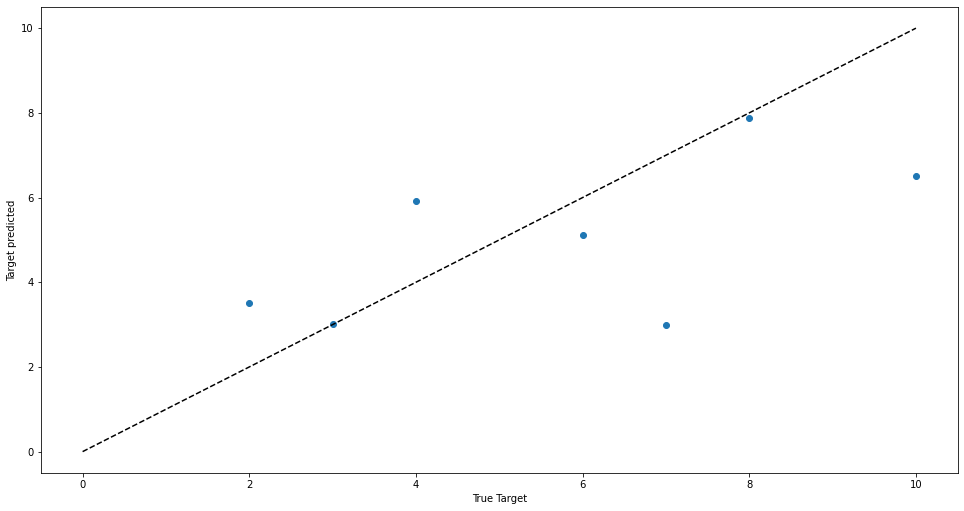

In [25]:
f, ax1 = plt.subplots(sharey=True, figsize=(15,8))

ax1.scatter(lbl, predicted)
ax1.plot([0, 10], [0, 10], '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')

f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

## Перебор всех фильмов и моделей

In [ ]:
%%capture cap --no-stderr
AVERAGE_MAE = 0
AVERAGE_MAPE = 0
AVERAGE_R2 = 0
BEST_MODELS_MAE = []
BEST_MODELS_MAPE = []
BEST_MODELS_R2 = []
MIN_MAE = np.inf
MIN_MAPE = np.inf
MAX_R2 = -np.inf
MAX_MAE = -np.inf
MAX_MAPE = -np.inf
MIN_R2 = np.inf
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
for film in tqdm_notebook(range(41, 49)):
    best = []
    best_features = []
    print('Testing for ', film - 40 , 'film')
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = X_train['labels']
    y_test_inv = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    X_train = X_train.drop(['labels'], axis=1)
    X_test = X_test.drop(['labels'], axis=1)
    
    X_train = X_train.drop(['film', 'ch', 'Subj'], axis=1)
    X_test = X_test.drop(['film', 'ch', 'Subj'], axis=1)
    
    qt_train = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
    qt_test = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test_inv).reshape(-1, 1)))
    
    SKB = SelectKBest(score_func=f_regression, k=100)
    X_new = SKB.fit_transform(X_train, y_train)
    indices = SKB.get_support(indices=True)
    selected_features = [X_train.columns[indices[i]] for i in range(len(indices))]
    print('-----------------------------------------------------------------------')
    print('selected features by SKB: ', selected_features)
    print('-----------------------------------------------------------------------')
    print('Ridge')
    alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
    searcher.fit(X_train, y_train)
    print('Ridge alpha', searcher.best_params_["alpha"])
    model = Ridge(searcher.best_params_["alpha"]).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Ridge r2:', r2_score(y_test, y_pred))
    print('Ridge MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('Ridge MAE : ', mean_absolute_error(y_test, y_pred))
    preds = qt_test.inverse_transform(y_pred)
    print('Ridge inverted r2:', r2_score(preds, y_test_inv))
    print('Ridge inverted MAPE: ', mean_absolute_percentage_error(preds, y_test_inv))
    print('Ridge inverted MAE: ', mean_absolute_error(preds, y_test_inv))
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    print('Ridge inverted by film r2:', r2_score(lbl, predicted))
    print('Ridge inverted by film MAPE:', mean_absolute_percentage_error(lbl, predicted))
    print('Ridge inverted by film MAE:', mean_absolute_error(lbl ,predicted))
    best.append({'MAE' : mean_absolute_error(lbl ,predicted), 'MAPE' : mean_absolute_percentage_error(lbl, predicted), 'r2' : r2_score(lbl, predicted) , 'model' : 'Ridge'})
    for [l, p] in zip(lbl, predicted):
        print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
    for i in range(33, len(channels)):
        print('predictions by channel', channels[i])
    print('-----------------------------------------------------------------')
    print('ElasticNet')
    model = ElasticNet(alpha=0.001, l1_ratio=1).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('ElasticNet r2:', r2_score(y_test, y_pred))
    print('ElasticNet MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('ElasticNet MAE : ', mean_absolute_error(y_test, y_pred))
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    print('ElasticNet inverted r2:', r2_score(preds, y_test_inv))
    print('ElasticNet inverted MAPE: ', mean_absolute_percentage_error(preds, y_test_inv))
    print('ElasticNet inverted MAE: ', mean_absolute_error(preds, y_test_inv))
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    print('ElasticNet inverted by film r2:', r2_score(lbl, predicted))
    print('ElasticNet inverted by film MAPE:', mean_absolute_percentage_error(lbl, predicted))
    print('ElasticNet inverted by film MAE:', mean_absolute_error(lbl ,predicted))
    best.append({'MAE' : mean_absolute_error(lbl ,predicted), 'MAPE' : mean_absolute_percentage_error(lbl, predicted), 'r2' : r2_score(lbl, predicted) , 'model' : 'ElasticNet'})
    for [l, p] in zip(lbl, predicted):
        print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
    for i in range(33, len(channels)):
        print('predictions by channel', channels[i])
    print('-----------------------------------------------------------------')
    print('LinearRegression')
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('LinearRegression r2:', r2_score(y_test, y_pred))
    print('LinearRegression MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('LinearRegression MAE : ', mean_absolute_error(y_test, y_pred))
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    print('LinearRegression inverted r2:', r2_score(preds, y_test_inv))
    print('LinearRegression inverted MAPE: ', mean_absolute_percentage_error(preds, y_test_inv))
    print('LinearRegression inverted MAE: ', mean_absolute_error(preds, y_test_inv))
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    print('LinearRegression inverted by film r2:', r2_score(lbl, predicted))
    print('LinearRegression inverted by film MAPE:', mean_absolute_percentage_error(lbl, predicted))
    print('LinearRegression inverted by film MAE:', mean_absolute_error(lbl ,predicted))
    best.append({'MAE' : mean_absolute_error(lbl ,predicted), 'MAPE' : mean_absolute_percentage_error(lbl, predicted), 'r2' : r2_score(lbl, predicted) , 'model' : 'LinearRegression'})

    for [l, p] in zip(lbl, predicted):
        print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
    for i in range(33, len(channels)):
        print('predictions by channel', channels[i])
    print('-----------------------------------------------------------------')
    
    print('Lasso')
    alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    param_grid = dict(alpha=alpha)
    grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, scoring='neg_root_mean_squared_error', verbose=1, n_jobs=-1)
    grid_result = grid.fit(X_train, y_train)
    model = Lasso(grid.best_params_["alpha"]).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Lasso r2:', r2_score(y_test, y_pred))
    print('Lasso MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('Lasso MAE : ', mean_absolute_error(y_test, y_pred))
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    print('Lasso inverted r2:', r2_score(preds, y_test_inv))
    print('Lasso inverted MAPE: ', mean_absolute_percentage_error(preds, y_test_inv))
    print('Lasso inverted MAE: ', mean_absolute_error(preds, y_test_inv))
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    print('Lasso inverted by film r2:', r2_score(lbl, predicted))
    print('Lasso inverted by film MAPE:', mean_absolute_percentage_error(lbl, predicted))
    print('Lasso inverted by film MAE:', mean_absolute_error(lbl ,predicted))
    best.append({'MAE' : mean_absolute_error(lbl ,predicted), 'MAPE' : mean_absolute_percentage_error(lbl, predicted), 'r2' : r2_score(lbl, predicted) , 'model' : 'Lasso'})

    for [l, p] in zip(lbl, predicted):
        print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
    for i in range(33, len(channels)):
        print('predictions by channel', channels[i])
    print('-----------------------------------------------------------------')
    print('DecisionTreeRegressor')
    model = DecisionTreeRegressor().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('DecisionTreeRegressor r2:', r2_score(y_test, y_pred))
    print('DecisionTreeRegressor MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('DecisionTreeRegressor MAE : ', mean_absolute_error(y_test, y_pred))
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    print('DecisionTreeRegressor inverted r2:', r2_score(preds, y_test_inv))
    print('DecisionTreeRegressor inverted MAPE: ', mean_absolute_percentage_error(preds, y_test_inv))
    print('DecisionTreeRegressor inverted MAE: ', mean_absolute_error(preds, y_test_inv))
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    print('DecisionTreeRegressor inverted by film r2:', r2_score(lbl, predicted))
    print('DecisionTreeRegressor inverted by film MAPE:', mean_absolute_percentage_error(lbl, predicted))
    print('DecisionTreeRegressor inverted by film MAE:', mean_absolute_error(lbl ,predicted))
    best.append({'MAE' : mean_absolute_error(lbl ,predicted), 'MAPE' : mean_absolute_percentage_error(lbl, predicted), 'r2' : r2_score(lbl, predicted) , 'model' : 'DecisionTreeRegressor'})

    for [l, p] in zip(lbl, predicted):
        print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
    for i in range(33, len(channels)):
        print('predictions by channel', channels[i])
    print('-----------------------------------------------------------------')
    print('MLPRegressor')
    model = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('MLPRegressor r2:', r2_score(y_test, y_pred))
    print('MLPRegressor MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('MLPRegressor MAE : ', mean_absolute_error(y_test, y_pred))
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    print('MLPRegressor inverted r2:', r2_score(preds, y_test_inv))
    print('MLPRegressor inverted MAPE: ', mean_absolute_percentage_error(preds, y_test_inv))
    print('MLPRegressor inverted MAE: ', mean_absolute_error(preds, y_test_inv))
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    print('MLPRegressor inverted by film r2:', r2_score(lbl, predicted))
    print('MLPRegressor inverted by film MAPE:', mean_absolute_percentage_error(lbl, predicted))
    print('MLPRegressor inverted by film MAE:', mean_absolute_error(lbl ,predicted))
    best.append({'MAE' : mean_absolute_error(lbl ,predicted), 'MAPE' : mean_absolute_percentage_error(lbl, predicted), 'r2' : r2_score(lbl, predicted) , 'model' : 'MLPRegressor'})
    for [l, p] in zip(lbl, predicted):
        print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
    for i in range(33, len(channels)):
        print('predictions by channel', channels[i])

    print('-----------------------------------------------------------------')
    print('KNeighborsRegressor')
    model = neighbors.KNeighborsRegressor(n_neighbors=500).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('KNeighborsRegressor r2:', r2_score(y_test, y_pred))
    print('KNeighborsRegressor MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('KNeighborsRegressor MAE : ', mean_absolute_error(y_test, y_pred))
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    print('KNeighborsRegressor inverted r2:', r2_score(preds, y_test_inv))
    print('KNeighborsRegressor inverted MAPE: ', mean_absolute_percentage_error(preds, y_test_inv))
    print('KNeighborsRegressor inverted MAE: ', mean_absolute_error(preds, y_test_inv))
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    print('KNeighborsRegressor inverted by film r2:', r2_score(lbl, predicted))
    print('KNeighborsRegressor inverted by film MAPE:', mean_absolute_percentage_error(lbl, predicted))
    print('KNeighborsRegressor inverted by film MAE:', mean_absolute_error(lbl ,predicted))
    best.append({'MAE' : mean_absolute_error(lbl ,predicted), 'MAPE' : mean_absolute_percentage_error(lbl, predicted), 'r2' : r2_score(lbl, predicted) , 'model' : 'KNeighborsRegressor'})
    for [l, p] in zip(lbl, predicted):
        print('label : {:0.2f} predicted: {:0.2f} '.format(l, p))
    for i in range(33, len(channels)):
        print('predictions by channel', channels[i])
    print('----------------------------------------------------------------------------------------------')
    print('Best model by MAE', sorted(best, key=lambda x: x['MAE'])[0]['model'])
    print('MAE', sorted(best, key=lambda x: x['MAE'])[0]['MAE'])
    print('MAPE', sorted(best, key=lambda x: x['MAE'])[0]['MAPE'])
    print('R2', sorted(best, key=lambda x: x['MAE'])[0]['r2'])
    BEST_MODELS_MAE.append(sorted(best, key=lambda x: x['MAE'])[0]['model'])
    print('Best model by MAPE', sorted(best, key=lambda x: x['MAPE'])[0]['model'])
    print('MAE', sorted(best, key=lambda x: x['MAPE'])[0]['MAE'])
    print('MAPE', sorted(best, key=lambda x: x['MAPE'])[0]['MAPE'])
    print('R2', sorted(best, key=lambda x: x['MAPE'])[0]['r2'])
    BEST_MODELS_MAPE.append(sorted(best, key=lambda x: x['MAPE'])[0]['model'])
    print('Best model by R2', sorted(best, key=lambda x: x['r2'], reverse=True)[0]['model'])
    print('MAE', sorted(best, key=lambda x: x['r2'], reverse=True)[0]['MAE'])
    print('MAPE', sorted(best, key=lambda x: x['r2'], reverse=True)[0]['MAPE'])
    print('R2', sorted(best, key=lambda x: x['r2'], reverse=True)[0]['r2'])
    BEST_MODELS_R2.append(sorted(best, key=lambda x: x['r2'], reverse=True)[0]['model'])
    print('-----------------------------------------------------------------------------------------------')
    AVERAGE_MAE += sorted(best, key=lambda x: x['MAE'])[0]['MAE']
    AVERAGE_MAPE += sorted(best, key=lambda x: x['MAPE'])[0]['MAPE']
    AVERAGE_R2 += sorted(best, key=lambda x: x['r2'], reverse=True)[0]['r2']
    MIN_MAE = min(MIN_MAE, sorted(best, key=lambda x: x['MAE'])[0]['MAE'])
    MIN_MAPE = min(MIN_MAPE, sorted(best, key=lambda x: x['MAPE'])[0]['MAPE'])
    MIN_R2 = min(MIN_R2, sorted(best, key=lambda x: x['r2'], reverse=True)[0]['r2'])
    MAX_MAE = max(MAX_MAE, sorted(best, key=lambda x: x['MAE'])[0]['MAE'])
    MAX_MAPE = max(MAX_MAPE, sorted(best, key=lambda x: x['MAPE'])[0]['MAPE'])
    MAX_R2 = max(MAX_R2, sorted(best, key=lambda x: x['r2'], reverse=True)[0]['r2'])
    print('----------------------------------------------------------------------------------------------')
    print('----------------------------------------------------------------------------------------------')
AVERAGE_MAE /= 8
AVERAGE_MAPE /= 8
AVERAGE_R2 /= 8
print('AVERAGE INFO : MAE {:0.2f}, MAPE {:0.2f}, R2 {:0.2f}'.format(AVERAGE_MAE,AVERAGE_MAPE, AVERAGE_R2))
print('MIN MAE {:0.2f}, MIN MAPE {:0.2f}, MIN R2 {:0.2f}, MAX MAE {:0.2f}, MAX MAPE {:0.2f}, MAX R2 {:0.2f}'.format(MIN_MAE, MIN_MAPE, MIN_R2, MAX_MAE, MAX_MAPE, MAX_R2))
print('Best models')
print('By MAE: ', *BEST_MODELS_MAE)
print('By MAPE: ', *BEST_MODELS_MAPE)
print('By R2: ', *BEST_MODELS_R2)

In [26]:
# save the output in .txt format

In [ ]:
with open('minmax_full_factor_3.txt', 'w') as f:
    f.write(cap.stdout)

In [6]:
models = ['Ridge', 'ElasticNet', 'LinearRegression', 'Lasso', 'DecisionTreeRegressor', 'MLPRegressor', 'KNeighborsRegressor']
metrics = ['MAPE', 'MAE', 'R2']
formes = ['inverted', 'average']
columns = [
    np.array([models[i] for i in range(7) for j in range(3) for k in range(2)]),
    np.array([metrics[j] for i in range(7) for j in range(3) for k in range(2)]),
    np.array([formes[k] for i in range(7) for j in range(3) for k in range(2)]),
]

In [7]:
columns

[array(['Ridge', 'Ridge', 'Ridge', 'Ridge', 'Ridge', 'Ridge', 'ElasticNet',
        'ElasticNet', 'ElasticNet', 'ElasticNet', 'ElasticNet',
        'ElasticNet', 'LinearRegression', 'LinearRegression',
        'LinearRegression', 'LinearRegression', 'LinearRegression',
        'LinearRegression', 'Lasso', 'Lasso', 'Lasso', 'Lasso', 'Lasso',
        'Lasso', 'DecisionTreeRegressor', 'DecisionTreeRegressor',
        'DecisionTreeRegressor', 'DecisionTreeRegressor',
        'DecisionTreeRegressor', 'DecisionTreeRegressor', 'MLPRegressor',
        'MLPRegressor', 'MLPRegressor', 'MLPRegressor', 'MLPRegressor',
        'MLPRegressor', 'KNeighborsRegressor', 'KNeighborsRegressor',
        'KNeighborsRegressor', 'KNeighborsRegressor',
        'KNeighborsRegressor', 'KNeighborsRegressor'], dtype='<U21'),
 array(['MAPE', 'MAPE', 'MAE', 'MAE', 'R2', 'R2', 'MAPE', 'MAPE', 'MAE',
        'MAE', 'R2', 'R2', 'MAPE', 'MAPE', 'MAE', 'MAE', 'R2', 'R2',
        'MAPE', 'MAPE', 'MAE', 'MAE', 'R2', 'R2', 

In [8]:
from tqdm import tqdm_notebook

In [12]:
import warnings
import logging
warnings.filterwarnings('ignore')

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
logging.getLogger("np").setLevel(logging.WARNING)

In [19]:
chans = ['Fz', 'F3', 'F7','C3', 'T7', 'Pz', 'P3','P7', 'O1', 'Oz', 'O2','P4', 'P8', 'Cz','C4', 'T8', 'F4', 'F8']
result = pd.DataFrame()
for film in tqdm_notebook(range(41, 49)):
    df = pd.DataFrame(np.random.randn(1, 7 * 3 * 2), columns=columns)
    X_test = data_all.loc[(data_all['film'] == film)].reset_index(drop=True)
    X_train = data_all.loc[(data_all['film'] != film)].reset_index(drop=True)
    X_train = X_train.sample(frac=1)
    X_test = X_test.sample(frac=1)

    y_train = X_train['labels']
    y_test_inv = np.array(X_test['labels'])
    train_film = X_train['film']
    train_subj = X_train['Subj']
    train_ch = X_train['ch']
    test_film = X_test['film']
    test_subj = X_test['Subj']
    test_ch = np.array(X_test['ch'])
    X_train = X_train.drop(['labels'], axis=1)
    X_test = X_test.drop(['labels'], axis=1)
    
    X_train = X_train.drop(['film', 'ch', 'Subj'], axis=1)
    X_test = X_test.drop(['film', 'ch', 'Subj'], axis=1)
    
    qt_train = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
    qt_test = QuantileTransformer(output_distribution='normal',
                             copy=True)
    y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test_inv).reshape(-1, 1)))
    
    model = Ridge(alpha=0.001, max_iter=1000).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds = qt_test.inverse_transform(y_pred)
    df[('Ridge', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('Ridge', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('Ridge', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])

    df[('Ridge', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('Ridge', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('Ridge', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)
    

    model = ElasticNet(alpha=0.001, l1_ratio=1, max_iter=1000).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    df[('ElasticNet', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('ElasticNet', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('ElasticNet', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    df[('ElasticNet', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('ElasticNet', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('ElasticNet', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)
    

    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    df[('LinearRegression', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('LinearRegression', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('LinearRegression', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    df[('LinearRegression', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('LinearRegression', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('LinearRegression', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)

    alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    param_grid = dict(alpha=alpha)
    grid = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=[(slice(None), slice(None))])
    grid_result = grid.fit(X_train, y_train)
    model = Lasso(grid.best_params_["alpha"]).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    df[('Lasso', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('Lasso', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('Lasso', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    df[('Lasso', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('Lasso', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('Lasso', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)
    
    model = DecisionTreeRegressor().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    df[('DecisionTreeRegressor', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('DecisionTreeRegressor', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('DecisionTreeRegressor', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    df[('DecisionTreeRegressor', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('DecisionTreeRegressor', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('DecisionTreeRegressor', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)

    model = MLPRegressor(random_state=1, max_iter=1000, alpha=0.001).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    df[('MLPRegressor', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('MLPRegressor', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('MLPRegressor', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])

    df[('MLPRegressor', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('MLPRegressor', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('MLPRegressor', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)

    n_neighbors = [100, 300, 500, 1000]
    param_grid = dict(n_neighbors=n_neighbors)
    grid = GridSearchCV(estimator=neighbors.KNeighborsRegressor(), param_grid=param_grid, cv=[(slice(None), slice(None))])
    grid_result = grid.fit(X_train, y_train)
    model = neighbors.KNeighborsRegressor(n_neighbors=grid.best_params_['n_neighbors']).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))
    df[('KNeighborsRegressor', 'R2', 'inverted')] = r2_score(preds, y_test_inv)
    df[('KNeighborsRegressor', 'MAPE', 'inverted')] = mean_absolute_percentage_error(preds, y_test_inv)
    df[('KNeighborsRegressor', 'MAE', 'inverted')] = mean_absolute_error(preds, y_test_inv)
    
    pred = [[0 for j in range(8)] for i in range(42)]
    num_chans = [[0 for j in range(8)] for i in range(42)]
    labels = [[0 for j in range(8)] for i in range(42)]
    lbl = [[0 for j in range(8)] for i in range(42)]
    channels = [[] for i in range(40)]
    for i in range(len(preds)):
        pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
        num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
        labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
        channels[np.array(test_subj)[i]].append(chans[test_ch[i]])
    labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
    pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
    labels = np.nan_to_num(labels)
    pred = np.nan_to_num(pred)
    predicted = []
    lbl = []
    for i in range(len(labels)):
        if sum(labels[i]) != 0:
            for j in range(8):
                if labels[i][j] != 0:
                    lbl.append(labels[i][j])  
                    predicted.append(pred[i][j])
    df[('KNeighborsRegressor', 'R2', 'average')] = r2_score(lbl, predicted)
    df[('KNeighborsRegressor', 'MAPE', 'average')] = mean_absolute_percentage_error(lbl, predicted)
    df[('KNeighborsRegressor', 'MAE', 'average')] = mean_absolute_error(lbl, predicted)
    result = pd.concat([result, df], axis=0)

  0%|          | 0/8 [00:00<?, ?it/s]

In [20]:
result.index = [i for i in range(1, 9)]

In [21]:
result

Ridge                                                    ElasticNet  \
       MAPE                 MAE                   R2                 MAPE   
   inverted   average  inverted   average   inverted   average   inverted   
1  0.162450  0.378881  1.504673  1.842971  -6.454206 -0.037695   0.099247   
2  0.306435  0.304953  1.592687  1.605884   0.280016  0.483936   0.316339   
3  0.304719  0.803189  1.973403  1.990495  -3.286557 -1.692463   0.476691   
4  0.304871  1.531396  2.577365  3.108611 -11.889435 -1.002004   0.360104   
5  0.229688  0.344741  1.944444  1.846154  -4.606645 -0.983902   0.168479   
6  0.244470  0.463340  1.870637  1.920996  -2.011293 -0.135185   0.170538   
7  0.314832  0.637868  2.247706  2.277778  -3.737912 -1.263971   0.384013   
8  0.340557  0.929879  2.737687  2.717115  -3.642973 -0.626802   0.176931   

                                 ... MLPRegressor                      \
                  MAE            ...          MAE                  R2   
    average  inverted   average  ...     inverted   average  inverted   
1  0.267361  0.792999  1.136909  ...     0.364719  0.368441  0.805660   
2  0.396013  1.740313  1.755016  ...     1.392986  1.418445  0.587709   
3  0.685468  1.856069  1.859150  ...     1.363923  1.379068 -0.758615   
4  1.037337  2.509705  2.708598  ...     3.224790  3.380222 -2.011676   
5  0.197664  1.206945  1.278572  ...     1.323955  1.327163 -0.426383   
6  0.298627  1.179688  1.224857  ...     1.177496  1.160413 -0.044924   
7  0.524845  2.158659  2.272136  ...     2.314918  2.612065 -1.594193   
8  0.391887  0.893917  0.874897  ...     0.576062  0.557905  0.745254   

            KNeighborsRegressor                                          \
                           MAPE                 MAE                  R2   
    average            inverted   average  inverted   average  inverted   
1  0.944306            0.124444  0.350385  1.058575  1.492653 -4.240581   
2  0.574907            0.394074  0.717500  2.450194  2.473297 -4.849436   
3 -0.772646            0.288201  0.598342  1.528902  1.540734 -7.304156   
4 -0.858139            0.306830  1.322430  2.440367  2.866013 -7.634921   
5 -0.100824            0.218553  0.273948  1.629898  1.580996 -2.154497   
6  0.389567            0.229178  0.437560  1.577046  1.720196 -4.258101   
7 -1.574333            0.295072  0.463189  1.761396  1.819266 -3.336532   
8  0.864168            0.239611  0.708628  1.628487  1.608292 -1.743649   

             
             
    average  
1  0.102751  
2 -0.119285  
3 -0.558679  
4 -0.564822  
5 -0.109355  
6  0.105971  
7 -0.229788  
8  0.058232  

[8 rows x 42 columns]

In [22]:
writer = pd.ExcelWriter('metrics_all_tree.xlsx', engine='xlsxwriter')
result.to_excel(writer, sheet_name='metrics_all_tree')
writer.sheets['metrics_all_tree'].set_row(3, None, None, {'hidden': True})
writer.save()
writer.close()